Importing required libraries

In [1]:
import os
from imutils import paths
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import cv2
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report

d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\anaconda\envs\Beast_20220927\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Used viola and jones algorithms to detect face 

In [2]:
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

Example images

In [3]:
img1 = cv2.imread('1.jpg')
img2 = cv2.imread('2.jpg')

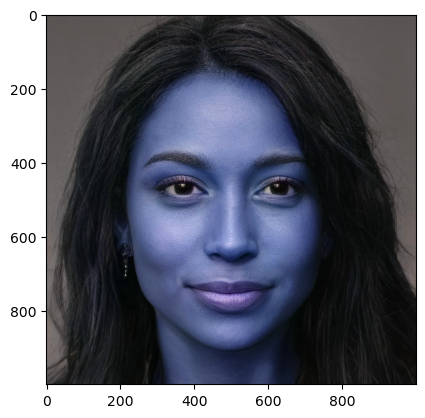

In [4]:
plt.imshow(img1)

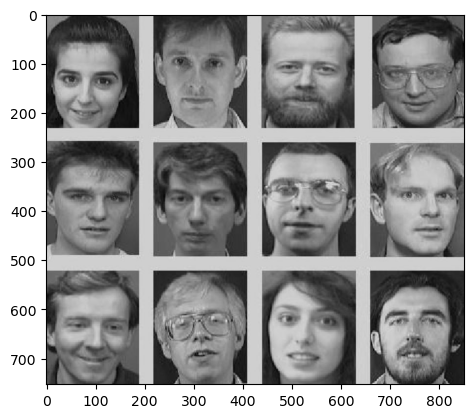

In [5]:
plt.imshow(img2)

Detect faces in images using the below code

image 1

In [6]:
while True:
    # Getting face data and coordinates
    faces = haar_data.detectMultiScale(img1)
    for x,y,w,h in faces:
        # drawing rectangle over the face
        cv2.rectangle(img1,(x,y),(x+w,y+h), (255,0,255),4)
    cv2.imshow('result',img1)
    # if the `q` key was pressed, break from the loop
    if cv2.waitKey(1) == ord("q"):
        break
cv2.destroyAllWindows()

image 2

In [7]:
while True:
    # Getting face data and coordinates
    faces = haar_data.detectMultiScale(img2)
    for x,y,w,h in faces:
        # drawing rectangle over the face
        cv2.rectangle(img2,(x,y),(x+w,y+h), (255,0,255),4)
    cv2.imshow('result',img2)
    # if the `q` key was pressed, break from the loop
    if cv2.waitKey(1) == ord("q"):
        break
cv2.destroyAllWindows()

#### reading data from dataset 

In [8]:
DIRECTORY = r"F:\mask detection\dataset"
CATEGORIES = ["with_mask", "without_mask"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading images...")

data = []
labels = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        data.append(image)
        
        if category == 'with_mask':
            labels.append(0)
        else:
            labels.append(1)


data = np.array(data, dtype="float32")
labels = np.array(labels)

[INFO] loading images...


d:\anaconda\envs\Beast_20220927\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [10]:
data.shape

(3833, 224, 224, 3)

Reshaping datas

In [11]:
data = data.reshape(3833,224*224*3)

In [12]:
data.shape

(3833, 150528)

In [13]:
labels.shape

(3833,)

Now data and labels are in same dimensions

#### Model training

Train test split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

#### Support vector machine

In [16]:
from sklearn.svm import SVC

In [17]:
model_svm = SVC(kernel='linear', C=0.05)
model_svm.fit(X_train, y_train)

SVC(C=0.05, kernel='linear')

In [19]:
y_pred_svm = model_svm.predict(X_test)

In [20]:
print(accuracy_score(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

0.9197080291970803
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       499
           1       0.89      0.95      0.92       460

    accuracy                           0.92       959
   macro avg       0.92      0.92      0.92       959
weighted avg       0.92      0.92      0.92       959



Hyper-parameter tuning


In [18]:
from sklearn.model_selection import GridSearchCV
grid_model_svm = GridSearchCV(model_svm,param_grid={'kernel': ['linear','rbf','sigmoid']})


In [21]:
grid_model_svm.fit(X_train,y_train)

In [ ]:
grid_model_svm.best_params_

In [ ]:
y_pred_grid_svm = model_svm.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_grid_svm))
print(classification_report(y_test,y_pred_grid_svm))

In [19]:
import pickle
# pickle.dump(model_svm, open('model_svm.pkl', 'wb'))